In [1]:
# Classes are as listed below:

# ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
# ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
# ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
# ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
# ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
# (10, b'No passing for vehicles over 3.5 metric tons')
# (11, b'Right-of-way at the next intersection') (12, b'Priority road')
# (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
# (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
# (18, b'General caution') (19, b'Dangerous curve to the left')
# (20, b'Dangerous curve to the right') (21, b'Double curve')
# (22, b'Bumpy road') (23, b'Slippery road')
# (24, b'Road narrows on the right') (25, b'Road work')
# (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
# (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
# (31, b'Wild animals crossing')
# (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
# (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
# (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
# (40, b'Roundabout mandatory') (41, b'End of no passing')
# (42, b'End of no passing by vehicles over 3.5 metric tons')

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 

In [3]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)

with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
    
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
x_train,y_train = train ['features'],train['labels']
x_validation,y_validation= valid['features'],valid['labels']
x_test ,y_test = test['features'],valid['labels']

In [5]:
x_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
x_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
x_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(4410,)

1

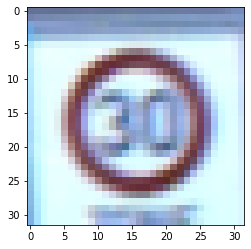

In [11]:
#Image exploration 
i=512
plt.imshow(x_validation[i])
y_validation[i]

In [12]:
from sklearn.utils import shuffle
x_train,y_train = shuffle(x_train,y_train)

In [13]:
x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims = True)


In [14]:
x_train_gray.shape

(34799, 32, 32, 1)

In [15]:
x_test_gray.shape

(12630, 32, 32, 1)

In [16]:
x_validation_gray.shape

(4410, 32, 32, 1)

In [17]:
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

In [18]:
x_train_gray_norm.shape

(34799, 32, 32, 1)

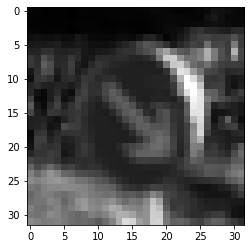

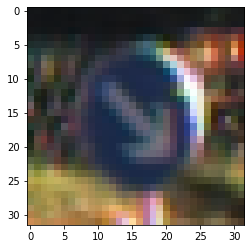

In [19]:
i = 610
plt.imshow(x_train_gray[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i])



In [20]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam 
from keras.callbacks import TensorBoard



Using TensorFlow backend.
/Users/kumar.deepak/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kumar.deepak/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kumar.deepak/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kumar.deepak/opt

In [21]:
#Model training 

# The model consists of the following layers:

# STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
# Input = 32x32x1
# Output = 28x28x6
# Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
# Used a 5x5 Filter with input depth of 3 and output depth of 6
# Apply a RELU Activation function to the output
# pooling for input, Input = 28x28x6 and Output = 14x14x6
# * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

cnn_model = Sequential()

cnn_model.add(Convolution2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))

#reducing sub - sampling 
cnn_model.add(AveragePooling2D())

# STEP 2: THE SECOND CONVOLUTIONAL LAYER #2

# Input = 14x14x6
# Output = 10x10x16
# Layer 2: Convolutional layer with Output = 10x10x16
# Output = (Input-filter+1)/strides => 10 = 14-5+1/1
# Apply a RELU Activation function to the output
# Pooling with Input = 10x10x16 and Output = 5x5x16
cnn_model.add(Convolution2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())


# STEP 3: FLATTENING THE NETWORK

# Flatten the network with Input = 5x5x16 and Output = 400

cnn_model.add(Flatten())

# STEP 4: FULLY CONNECTED LAYER

# Layer 3: Fully Connected layer with Input = 400 and Output = 120
# Apply a RELU Activation function to the output

cnn_model.add(Dense(units=120, activation='relu'))

# STEP 5: ANOTHER FULLY CONNECTED LAYER

# Layer 4: Fully Connected Layer with Input = 120 and Output = 84
# Apply a RELU Activation function to the output

cnn_model.add(Dense(units=84, activation='relu'))

# STEP 6: FULLY CONNECTED LAYER

# Layer 5: Fully Connected layer with Input = 84 and Output = 43

cnn_model.add(Dense(units=43, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
cnn_model.compile(loss= 'sparse_categorical_crossentropy',optimizer = Adam(lr = 0.001),metrics= ['accuracy'])

In [23]:
history = cnn_model.fit(x_train_gray_norm,
             y_train,
             batch_size = 500,
             nb_epoch = 50,
             verbose = 1,
             validation_data = (x_validation_gray_norm,y_validation))

/Users/kumar.deepak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 6s 186us/step - loss: 3.1937 - accuracy: 0.1839 - val_loss: 2.5096 - val_accuracy: 0.3404
Epoch 2/50
34799/34799 [==============================] - 6s 178us/step - loss: 1.5873 - accuracy: 0.5629 - val_loss: 1.2599 - val_accuracy: 0.6413
Epoch 3/50
34799/34799 [==============================] - 6s 185us/step - loss: 0.9063 - accuracy: 0.7524 - val_loss: 0.9200 - val_accuracy: 0.7385
Epoch 4/50
34799/34799 [==============================] - 6s 183us/step - loss: 0.6689 - accuracy: 0.8167 - val_loss: 0.7866 - val_accuracy: 0.7807
Epoch 5/50
34799/34799 [==============================] - 6s 180us/step - loss: 0.5399 - accuracy: 0.8549 - val_loss: 0.7298 - val_accuracy: 0.7982
Epoch 6/50
34799/34799 [==============================] - 6s 181us/step - loss: 0.4475 - accuracy: 0.8815 - val_loss: 0.6960 - val_accuracy: 0.8125
Epoch 7/50
34799/34799 [==============================] - 6s 18

In [38]:
x_test_gray_norm.shape
# x_test_gray_norm.reshape(4410)

(12630, 32, 32, 1)

In [33]:
y_test.shape

(4410,)

In [24]:
#MODEL EVALUATION

score = cnn_model.evaluate(x_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

ValueError: Input arrays should have the same number of samples as target arrays. Found 12630 input samples and 4410 target samples.

In [25]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [26]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']



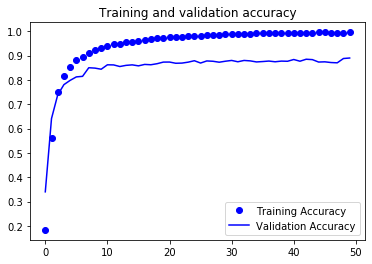

In [27]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo' ,label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b' ,label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()

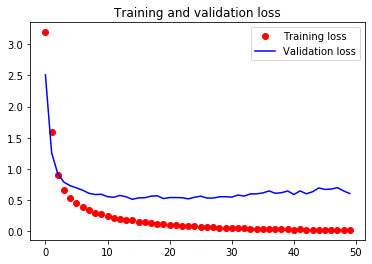

In [28]:
epochs = range(len(loss))

plt.plot(epochs, loss, 'ro' ,label = 'Training loss')
plt.plot(epochs, val_loss, 'b' ,label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [29]:
#confusion matrix 
predicted_classes = cnn_model.predict_classes(x_test_gray_norm)
y_true = y_test

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm ,annot= True)

ValueError: Found input variables with inconsistent numbers of samples: [4410, 12630]

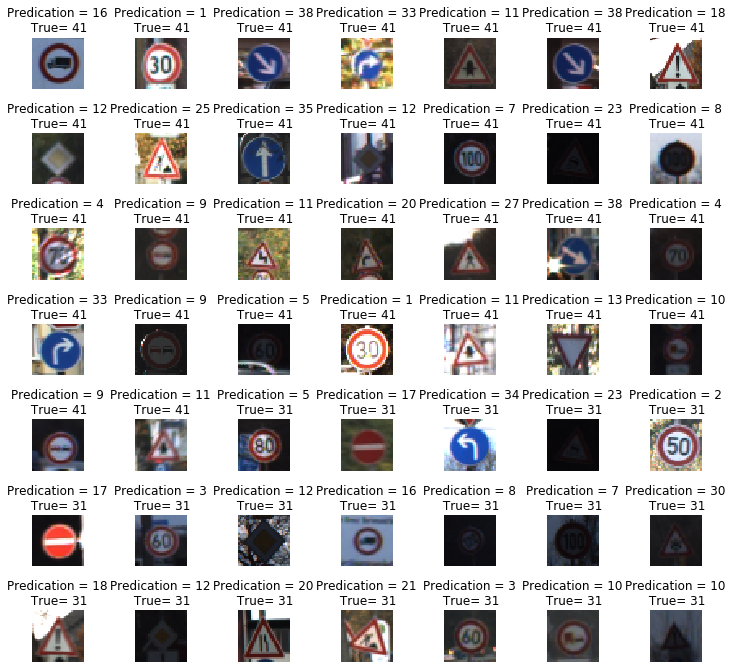

In [31]:
L = 7 
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Predication = {}\n True= {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)